Лабораторная работа №2. Метрические методы k ближайших соседей

Для начала импортируем необходимые библиотеки и подключим выбранный нами датафрейм

In [1193]:
import pandas as pd 
import numpy as np

In [1194]:
pokemon_df = pd.read_csv('C:/Users/User/Downloads/archive/Pokemon.csv') 
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Далее переименовываем для нашего удобства определенные столбцы и проверяем сохранение изменения.

In [1195]:
pokemon_df.rename(columns={'Type 1':'Type_1'}, inplace=True)
pokemon_df.rename(columns={'Type 2':'Type_2'}, inplace=True)
pokemon_df.rename(columns={'Sp. Atk':'Sp.Atk'}, inplace=True)
pokemon_df.rename(columns={'Sp. Def':'Sp.Def'}, inplace=True)

In [1196]:
pokemon_df

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Далее убираем столбцы, в которых хранятся слова, т.к. мы не сможем к ним применить метод k ближайших соседей.

In [1197]:
pokemon_df.drop("Name", axis=1, inplace=True)
pokemon_df.drop("Type_1", axis=1, inplace=True)
pokemon_df.drop("Type_2", axis=1, inplace=True)
pokemon_df.drop("Legendary", axis=1, inplace=True)

In [1198]:
pokemon_df

,#,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


При вызове таблицы мы видим, что остались столбцы только с цифрами внутри. Далее делаем подготовку для того, чтобы можно было применить метрические методы k ближайших соседей.

In [1199]:
X = pokemon_df.iloc[:, :-1].values
y = pokemon_df.iloc[:, 8].values

In [1200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [1201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Расстояние Минковского для 5 соседей

In [1202]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 6, 1, 1, 4, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 5, 5, 6, 3, 1, 5,
       1, 5, 2, 1, 4, 5, 6, 6, 3, 1, 1, 5, 4, 3, 5, 2, 5, 3, 6, 1, 5, 5,
       5, 6, 4, 6, 1, 3, 2, 6, 1, 3, 1, 3, 5, 3, 1, 1, 4, 3, 3, 1, 4, 5,
       2, 6, 4, 1, 4, 5, 4, 5, 4, 3, 3, 5, 1, 1, 4, 6, 1, 1, 5, 1, 1, 1,
       6, 5, 6, 3, 2, 1, 2, 2, 3, 1, 2, 4, 4, 5, 4, 5, 3, 5, 5, 2, 1, 1,
       5, 3, 3, 6, 5, 1, 6, 2, 1, 4, 2, 5, 4, 2, 5, 3, 4, 6, 5, 3, 5, 2,
       3, 3, 1, 1, 4, 2, 1, 2, 2, 1, 3, 5, 4, 3, 3, 5, 4, 2, 1, 2, 1, 4,
       5, 2, 4, 2, 1, 5, 4, 3, 5, 3, 1, 3, 4, 2, 2, 4, 3, 5, 6, 3, 2, 4,
       5, 3, 5, 3, 4, 1, 5, 5, 3, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       3, 3, 4, 5, 6, 2, 4, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 3,
       5, 1, 5, 3, 5, 1, 1, 3, 1, 1, 6, 5, 1, 5, 1, 1, 1, 2, 4, 5, 6, 1,
       6, 5, 4, 3, 6, 5, 3, 5, 1, 3, 5, 3, 5, 5, 5, 3, 1, 4, 5, 1, 6, 3,
       3, 1, 1, 1, 3, 2, 6, 3, 5, 4, 2, 1, 2, 3, 4, 2, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 4, 1, 3, 5, 5, 4,

In [1203]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0. , 0. , 0. , 0.4, 0. , 0.6],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0.6],
       [0.4, 0. , 0.4, 0.2, 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. ]])

In [1204]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 136


In [1205]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.57 


Расстояние Минковского для 7 соседей

In [1206]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 5, 1, 1, 4, 2, 3, 1, 1, 2, 1, 1, 2, 1, 3, 6, 5, 6, 3, 1, 5,
       1, 5, 2, 1, 4, 6, 6, 6, 3, 1, 1, 5, 4, 3, 5, 3, 5, 2, 5, 1, 5, 5,
       5, 6, 4, 5, 1, 3, 2, 6, 1, 3, 1, 3, 5, 3, 1, 1, 4, 3, 3, 1, 4, 5,
       1, 5, 4, 1, 4, 5, 4, 5, 4, 3, 3, 4, 1, 1, 4, 6, 1, 1, 5, 3, 1, 4,
       5, 5, 6, 4, 1, 1, 2, 3, 3, 1, 3, 4, 4, 5, 4, 5, 3, 5, 4, 2, 2, 1,
       5, 3, 3, 5, 5, 1, 6, 2, 1, 4, 3, 5, 5, 2, 5, 3, 5, 5, 5, 2, 5, 2,
       3, 3, 1, 1, 4, 2, 1, 2, 2, 1, 3, 5, 5, 3, 3, 5, 4, 2, 1, 2, 1, 4,
       5, 3, 4, 2, 1, 5, 5, 3, 5, 5, 1, 3, 4, 2, 2, 5, 3, 5, 5, 1, 2, 3,
       5, 3, 5, 3, 4, 1, 5, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 6, 5, 6, 2, 4, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 3,
       5, 1, 5, 3, 5, 1, 1, 3, 1, 1, 5, 5, 1, 5, 1, 1, 1, 3, 5, 5, 6, 1,
       5, 5, 4, 3, 6, 5, 1, 6, 1, 5, 5, 3, 5, 5, 5, 3, 1, 4, 5, 1, 6, 5,
       3, 1, 1, 1, 3, 2, 6, 3, 5, 4, 4, 1, 1, 3, 4, 1, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 4, 1, 3, 5, 5, 4,

In [1207]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.        , 0.28571429, 0.28571429,
        0.42857143],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.14285714, 0.42857143,
        0.42857143],
       [0.42857143, 0.        , 0.28571429, 0.28571429, 0.        ,
        0.        ],
       [0.71428571, 0.14285714, 0.14285714, 0.        , 0.        ,
        0.        ]])

In [1208]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 132


In [1209]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.59 


Расстояние Минковского для 9 соседей

In [1210]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([5, 1, 6, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 5, 5, 6, 6, 1, 5,
       1, 5, 2, 1, 5, 5, 6, 6, 3, 1, 1, 5, 4, 3, 5, 3, 5, 3, 5, 1, 5, 5,
       5, 6, 4, 5, 1, 3, 2, 6, 1, 3, 1, 3, 5, 2, 1, 1, 3, 3, 2, 1, 6, 5,
       1, 5, 4, 1, 5, 5, 4, 5, 4, 3, 3, 5, 1, 1, 3, 6, 1, 1, 4, 3, 1, 3,
       6, 5, 6, 4, 1, 1, 2, 1, 2, 1, 3, 4, 4, 5, 3, 5, 3, 5, 5, 3, 1, 1,
       5, 3, 3, 5, 5, 1, 6, 2, 1, 5, 3, 5, 5, 2, 6, 3, 5, 5, 5, 3, 5, 1,
       3, 3, 1, 1, 4, 2, 1, 4, 2, 1, 3, 4, 5, 5, 3, 5, 5, 2, 1, 2, 1, 4,
       4, 3, 4, 2, 1, 5, 5, 2, 5, 5, 1, 2, 4, 2, 2, 5, 3, 5, 5, 1, 2, 3,
       5, 3, 5, 3, 4, 1, 5, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 5, 5, 6, 1, 4, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 3,
       5, 2, 5, 3, 5, 1, 1, 3, 1, 1, 5, 5, 1, 5, 1, 1, 1, 3, 5, 5, 6, 1,
       5, 5, 4, 3, 6, 5, 1, 6, 1, 5, 5, 3, 5, 5, 5, 3, 1, 4, 5, 1, 6, 5,
       3, 1, 1, 1, 3, 2, 6, 4, 5, 4, 2, 1, 1, 3, 5, 2, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 5, 3, 4, 1, 3, 5, 6, 4,

In [1211]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.        , 0.22222222, 0.44444444,
        0.33333333],
       [0.88888889, 0.11111111, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.11111111, 0.33333333,
        0.55555556],
       [0.44444444, 0.        , 0.22222222, 0.33333333, 0.        ,
        0.        ],
       [0.77777778, 0.11111111, 0.11111111, 0.        , 0.        ,
        0.        ]])

In [1212]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 141


In [1213]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.56 


Манхэттенское расстояние для 5 соседей

In [1214]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([4, 1, 5, 1, 1, 5, 2, 3, 1, 1, 2, 1, 1, 2, 1, 3, 6, 3, 6, 3, 1, 5,
       2, 3, 2, 1, 3, 5, 6, 6, 3, 1, 1, 4, 4, 3, 5, 3, 3, 3, 6, 1, 5, 5,
       5, 6, 5, 6, 1, 3, 2, 6, 1, 3, 1, 3, 5, 1, 1, 1, 4, 3, 3, 1, 4, 5,
       1, 5, 4, 1, 4, 5, 4, 5, 4, 3, 3, 5, 1, 1, 3, 5, 1, 1, 4, 3, 1, 1,
       5, 5, 6, 4, 2, 1, 2, 1, 3, 1, 2, 5, 4, 5, 4, 5, 3, 5, 5, 2, 1, 1,
       5, 2, 3, 5, 5, 1, 5, 2, 1, 4, 2, 5, 5, 2, 6, 3, 5, 6, 5, 3, 5, 1,
       3, 3, 1, 1, 4, 1, 2, 4, 2, 1, 3, 5, 5, 5, 3, 5, 5, 2, 1, 3, 1, 5,
       2, 2, 4, 2, 1, 5, 4, 2, 5, 5, 1, 3, 3, 2, 2, 4, 2, 5, 6, 1, 2, 4,
       3, 3, 5, 3, 4, 1, 5, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 6, 5, 6, 2, 4, 3, 1, 3, 4, 1, 3, 3, 2, 5, 5, 1, 1, 4, 1, 4,
       5, 1, 5, 3, 5, 1, 1, 2, 1, 1, 5, 5, 1, 4, 1, 1, 1, 3, 4, 5, 5, 1,
       6, 5, 4, 3, 6, 5, 1, 6, 2, 5, 5, 3, 4, 5, 5, 4, 1, 3, 5, 1, 6, 3,
       3, 1, 1, 1, 3, 2, 6, 3, 5, 4, 2, 1, 2, 4, 4, 2, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 3, 1, 3, 5, 5, 4,

In [1215]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0. , 0. , 0. , 0.4, 0.2, 0.4],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0.4],
       [0.4, 0. , 0.4, 0.2, 0. , 0. ],
       [0.6, 0.2, 0.2, 0. , 0. , 0. ]])

In [1216]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 107


In [1217]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.67 


Манхэттенское расстояние для 7 соседей

In [1218]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 5, 4, 1, 4, 3, 2, 1, 2, 2, 1, 1, 2, 1, 3, 6, 5, 6, 3, 1, 5,
       2, 3, 2, 1, 4, 5, 6, 6, 3, 1, 1, 4, 4, 3, 5, 2, 5, 3, 6, 1, 5, 5,
       5, 6, 5, 6, 1, 3, 2, 6, 1, 3, 1, 4, 5, 3, 1, 1, 4, 2, 3, 1, 4, 5,
       1, 6, 4, 1, 4, 5, 4, 5, 4, 3, 3, 5, 1, 1, 3, 6, 1, 1, 4, 3, 1, 1,
       5, 5, 6, 4, 2, 1, 2, 2, 3, 1, 2, 4, 3, 5, 4, 5, 3, 6, 5, 3, 1, 1,
       5, 3, 3, 5, 5, 1, 6, 2, 1, 4, 3, 5, 5, 2, 6, 3, 5, 6, 5, 3, 5, 1,
       3, 3, 1, 1, 4, 2, 1, 4, 2, 1, 3, 5, 5, 3, 3, 5, 4, 2, 1, 3, 2, 4,
       3, 3, 4, 2, 1, 5, 4, 4, 5, 5, 1, 3, 3, 2, 2, 4, 3, 5, 5, 1, 2, 4,
       3, 3, 5, 3, 4, 1, 3, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 6, 5, 6, 1, 3, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 1, 4,
       5, 1, 5, 1, 5, 1, 1, 2, 1, 1, 5, 5, 1, 4, 1, 1, 1, 3, 4, 5, 6, 1,
       6, 3, 5, 3, 6, 5, 1, 6, 2, 5, 5, 3, 4, 5, 5, 3, 1, 3, 5, 1, 6, 4,
       3, 1, 1, 1, 3, 1, 6, 1, 5, 4, 3, 1, 2, 4, 4, 2, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 4, 1, 3, 5, 5, 4,

In [1219]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.14285714, 0.28571429, 0.14285714,
        0.42857143],
       [0.85714286, 0.14285714, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.14285714, 0.57142857,
        0.28571429],
       [0.28571429, 0.        , 0.28571429, 0.42857143, 0.        ,
        0.        ],
       [0.71428571, 0.14285714, 0.14285714, 0.        , 0.        ,
        0.        ]])

In [1220]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 101


In [1221]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.68 


Манхэттенское расстояние для 9 соседей

In [1222]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric='manhattan')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([5, 1, 5, 1, 1, 4, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 5, 3, 6, 3, 1, 5,
       1, 5, 2, 1, 4, 6, 6, 6, 3, 1, 1, 4, 4, 3, 5, 3, 5, 3, 6, 1, 5, 5,
       5, 6, 5, 6, 1, 3, 2, 6, 1, 3, 1, 3, 5, 3, 1, 1, 4, 3, 3, 1, 4, 5,
       1, 6, 4, 1, 4, 5, 4, 5, 4, 3, 3, 5, 1, 1, 4, 6, 1, 1, 4, 3, 1, 1,
       5, 5, 6, 4, 1, 1, 2, 1, 3, 1, 3, 5, 4, 6, 3, 5, 3, 5, 4, 3, 1, 1,
       5, 3, 3, 5, 5, 1, 6, 2, 1, 5, 3, 5, 5, 2, 6, 3, 5, 6, 5, 3, 5, 1,
       4, 3, 1, 1, 3, 2, 1, 2, 2, 1, 3, 4, 4, 5, 3, 5, 4, 2, 1, 3, 1, 5,
       3, 3, 3, 2, 1, 5, 5, 2, 5, 5, 1, 3, 3, 2, 2, 5, 3, 4, 5, 1, 2, 4,
       3, 3, 5, 3, 4, 1, 3, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 5, 5, 6, 1, 3, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 4,
       5, 1, 5, 3, 5, 1, 1, 2, 1, 1, 5, 5, 1, 4, 1, 1, 1, 3, 6, 5, 6, 1,
       6, 5, 4, 3, 6, 5, 1, 6, 3, 5, 5, 3, 4, 4, 5, 3, 1, 3, 5, 3, 6, 4,
       3, 1, 1, 1, 3, 1, 6, 1, 5, 4, 3, 1, 2, 4, 4, 2, 6, 1, 5, 5, 3, 3,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 4, 1, 3, 5, 5, 4,

In [1223]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.11111111, 0.22222222, 0.33333333,
        0.33333333],
       [0.88888889, 0.11111111, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.11111111, 0.55555556,
        0.33333333],
       [0.44444444, 0.        , 0.22222222, 0.33333333, 0.        ,
        0.        ],
       [0.66666667, 0.11111111, 0.22222222, 0.        , 0.        ,
        0.        ]])

In [1224]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 115


In [1225]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.64 


Евклидово расстояние для 5 соседей

In [1226]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 6, 1, 1, 4, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 5, 5, 6, 3, 1, 5,
       1, 5, 2, 1, 4, 5, 6, 6, 3, 1, 1, 5, 4, 3, 5, 2, 5, 3, 6, 1, 5, 5,
       5, 6, 4, 6, 1, 3, 2, 6, 1, 3, 1, 3, 5, 3, 1, 1, 4, 3, 3, 1, 4, 5,
       2, 6, 4, 1, 4, 5, 4, 5, 4, 3, 3, 5, 1, 1, 4, 6, 1, 1, 5, 1, 1, 1,
       6, 5, 6, 3, 2, 1, 2, 2, 3, 1, 2, 4, 4, 5, 4, 5, 3, 5, 5, 2, 1, 1,
       5, 3, 3, 6, 5, 1, 6, 2, 1, 4, 2, 5, 4, 2, 5, 3, 4, 6, 5, 3, 5, 2,
       3, 3, 1, 1, 4, 2, 1, 2, 2, 1, 3, 5, 4, 3, 3, 5, 4, 2, 1, 2, 1, 4,
       5, 2, 4, 2, 1, 5, 4, 3, 5, 3, 1, 3, 4, 2, 2, 4, 3, 5, 6, 3, 2, 4,
       5, 3, 5, 3, 4, 1, 5, 5, 3, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       3, 3, 4, 5, 6, 2, 4, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 3,
       5, 1, 5, 3, 5, 1, 1, 3, 1, 1, 6, 5, 1, 5, 1, 1, 1, 2, 4, 5, 6, 1,
       6, 5, 4, 3, 6, 5, 3, 5, 1, 3, 5, 3, 5, 5, 5, 3, 1, 4, 5, 1, 6, 3,
       3, 1, 1, 1, 3, 2, 6, 3, 5, 4, 2, 1, 2, 3, 4, 2, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 4, 1, 3, 5, 5, 4,

In [1227]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0. , 0. , 0. , 0.4, 0. , 0.6],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0.6],
       [0.4, 0. , 0.4, 0.2, 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. ]])

In [1228]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 136


In [1229]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.57 


Евклидово расстояние для 7 соседей

In [1230]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 5, 1, 1, 4, 2, 3, 1, 1, 2, 1, 1, 2, 1, 3, 6, 5, 6, 3, 1, 5,
       1, 5, 2, 1, 4, 6, 6, 6, 3, 1, 1, 5, 4, 3, 5, 3, 5, 2, 5, 1, 5, 5,
       5, 6, 4, 5, 1, 3, 2, 6, 1, 3, 1, 3, 5, 3, 1, 1, 4, 3, 3, 1, 4, 5,
       1, 5, 4, 1, 4, 5, 4, 5, 4, 3, 3, 4, 1, 1, 4, 6, 1, 1, 5, 3, 1, 4,
       5, 5, 6, 4, 1, 1, 2, 3, 3, 1, 3, 4, 4, 5, 4, 5, 3, 5, 4, 2, 2, 1,
       5, 3, 3, 5, 5, 1, 6, 2, 1, 4, 3, 5, 5, 2, 5, 3, 5, 5, 5, 2, 5, 2,
       3, 3, 1, 1, 4, 2, 1, 2, 2, 1, 3, 5, 5, 3, 3, 5, 4, 2, 1, 2, 1, 4,
       5, 3, 4, 2, 1, 5, 5, 3, 5, 5, 1, 3, 4, 2, 2, 5, 3, 5, 5, 1, 2, 3,
       5, 3, 5, 3, 4, 1, 5, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 6, 5, 6, 2, 4, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 3,
       5, 1, 5, 3, 5, 1, 1, 3, 1, 1, 5, 5, 1, 5, 1, 1, 1, 3, 5, 5, 6, 1,
       5, 5, 4, 3, 6, 5, 1, 6, 1, 5, 5, 3, 5, 5, 5, 3, 1, 4, 5, 1, 6, 5,
       3, 1, 1, 1, 3, 2, 6, 3, 5, 4, 4, 1, 1, 3, 4, 1, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 4, 3, 4, 1, 3, 5, 5, 4,

In [1231]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.        , 0.28571429, 0.28571429,
        0.42857143],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.14285714, 0.42857143,
        0.42857143],
       [0.42857143, 0.        , 0.28571429, 0.28571429, 0.        ,
        0.        ],
       [0.71428571, 0.14285714, 0.14285714, 0.        , 0.        ,
        0.        ]])

In [1232]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 132


In [1233]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.59 


Евклидово расстояние для 9 соседей

In [1234]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([5, 1, 6, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 5, 5, 6, 6, 1, 5,
       1, 5, 2, 1, 5, 5, 6, 6, 3, 1, 1, 5, 4, 3, 5, 3, 5, 3, 5, 1, 5, 5,
       5, 6, 4, 5, 1, 3, 2, 6, 1, 3, 1, 3, 5, 2, 1, 1, 3, 3, 2, 1, 6, 5,
       1, 5, 4, 1, 5, 5, 4, 5, 4, 3, 3, 5, 1, 1, 3, 6, 1, 1, 4, 3, 1, 3,
       6, 5, 6, 4, 1, 1, 2, 1, 2, 1, 3, 4, 4, 5, 3, 5, 3, 5, 5, 3, 1, 1,
       5, 3, 3, 5, 5, 1, 6, 2, 1, 5, 3, 5, 5, 2, 6, 3, 5, 5, 5, 3, 5, 1,
       3, 3, 1, 1, 4, 2, 1, 4, 2, 1, 3, 4, 5, 5, 3, 5, 5, 2, 1, 2, 1, 4,
       4, 3, 4, 2, 1, 5, 5, 2, 5, 5, 1, 2, 4, 2, 2, 5, 3, 5, 5, 1, 2, 3,
       5, 3, 5, 3, 4, 1, 5, 5, 6, 6, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       1, 3, 5, 5, 6, 1, 4, 3, 1, 3, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 3,
       5, 2, 5, 3, 5, 1, 1, 3, 1, 1, 5, 5, 1, 5, 1, 1, 1, 3, 5, 5, 6, 1,
       5, 5, 4, 3, 6, 5, 1, 6, 1, 5, 5, 3, 5, 5, 5, 3, 1, 4, 5, 1, 6, 5,
       3, 1, 1, 1, 3, 2, 6, 4, 5, 4, 2, 1, 1, 3, 5, 2, 6, 1, 5, 5, 3, 1,
       3, 3, 1, 3, 5, 4, 4, 5, 3, 4, 1, 3, 5, 6, 4,

In [1235]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.        , 0.22222222, 0.44444444,
        0.33333333],
       [0.88888889, 0.11111111, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.11111111, 0.33333333,
        0.55555556],
       [0.44444444, 0.        , 0.22222222, 0.33333333, 0.        ,
        0.        ],
       [0.77777778, 0.11111111, 0.11111111, 0.        , 0.        ,
        0.        ]])

In [1236]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 141


In [1237]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.56 


Расстояние Чебышева для 5 соседей

In [1238]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='chebyshev')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 6, 4, 1, 4, 2, 3, 1, 1, 2, 1, 1, 2, 1, 3, 6, 5, 6, 3, 1, 5,
       1, 3, 2, 1, 5, 5, 6, 6, 3, 1, 1, 5, 4, 4, 5, 3, 3, 3, 5, 1, 5, 5,
       5, 6, 4, 5, 1, 5, 2, 6, 1, 3, 1, 2, 5, 3, 1, 1, 4, 3, 3, 1, 4, 5,
       1, 5, 4, 2, 4, 5, 3, 5, 4, 2, 3, 6, 1, 1, 3, 4, 1, 1, 3, 2, 1, 4,
       6, 5, 5, 5, 1, 1, 2, 1, 3, 2, 3, 5, 4, 5, 4, 5, 2, 5, 5, 2, 2, 1,
       5, 3, 3, 6, 5, 1, 6, 2, 1, 5, 3, 5, 5, 2, 5, 3, 5, 6, 5, 3, 5, 2,
       2, 3, 1, 3, 3, 2, 1, 4, 2, 1, 3, 5, 3, 4, 3, 5, 4, 2, 1, 2, 1, 4,
       4, 3, 2, 2, 1, 5, 5, 2, 5, 5, 1, 2, 3, 2, 2, 5, 3, 5, 4, 1, 1, 4,
       4, 3, 3, 3, 4, 1, 5, 4, 5, 5, 1, 1, 5, 1, 1, 4, 1, 1, 4, 6, 6, 1,
       1, 3, 5, 5, 6, 3, 4, 3, 1, 4, 4, 1, 3, 4, 3, 5, 5, 1, 1, 5, 2, 5,
       5, 1, 5, 1, 4, 1, 1, 3, 1, 3, 5, 5, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       5, 5, 4, 4, 6, 4, 3, 6, 1, 4, 5, 1, 5, 5, 6, 3, 1, 4, 5, 2, 6, 6,
       5, 1, 1, 1, 3, 2, 5, 3, 5, 4, 2, 1, 1, 3, 4, 1, 6, 1, 5, 5, 3, 2,
       3, 4, 1, 3, 5, 4, 4, 5, 3, 4, 1, 3, 5, 6, 4,

In [1239]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0. , 0. , 0. , 0.4, 0. , 0.6],
       [1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.8],
       [0.2, 0. , 0.2, 0.6, 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. ]])

In [1240]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 162


In [1241]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.49 


Расстояние Чебышева для 7 соседей

In [1242]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric='chebyshev')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 6, 3, 1, 4, 2, 3, 1, 3, 2, 1, 2, 2, 1, 3, 6, 5, 6, 3, 1, 5,
       3, 5, 3, 1, 5, 5, 6, 6, 3, 1, 1, 5, 4, 2, 5, 3, 3, 3, 5, 1, 5, 5,
       5, 6, 4, 5, 1, 5, 2, 6, 3, 3, 1, 5, 5, 3, 1, 1, 3, 1, 3, 1, 6, 5,
       2, 5, 4, 1, 4, 5, 4, 5, 4, 2, 3, 4, 1, 1, 3, 6, 1, 1, 3, 3, 1, 4,
       6, 5, 5, 5, 1, 1, 3, 1, 2, 2, 3, 5, 4, 5, 4, 5, 2, 5, 5, 2, 2, 1,
       5, 3, 3, 6, 5, 1, 6, 2, 3, 5, 3, 5, 5, 2, 5, 3, 4, 5, 5, 3, 5, 2,
       3, 3, 1, 3, 4, 2, 1, 2, 2, 1, 3, 5, 3, 3, 3, 5, 4, 2, 1, 2, 1, 4,
       5, 2, 4, 2, 1, 5, 5, 2, 5, 5, 1, 2, 3, 2, 2, 5, 3, 5, 6, 1, 2, 3,
       5, 3, 5, 3, 4, 1, 5, 4, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 4, 5, 6, 1,
       3, 3, 5, 5, 6, 3, 4, 3, 1, 4, 4, 1, 3, 4, 1, 5, 5, 1, 2, 5, 2, 5,
       5, 1, 5, 3, 4, 1, 1, 3, 1, 3, 5, 5, 2, 5, 1, 1, 2, 4, 3, 5, 6, 1,
       5, 5, 4, 3, 6, 5, 3, 6, 1, 3, 5, 1, 5, 5, 5, 3, 1, 3, 5, 1, 6, 6,
       5, 1, 1, 1, 3, 2, 6, 3, 5, 4, 2, 1, 1, 3, 5, 1, 6, 1, 5, 5, 3, 1,
       3, 4, 1, 3, 5, 4, 4, 5, 3, 3, 1, 3, 5, 6, 4,

In [1243]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.        , 0.28571429, 0.28571429,
        0.42857143],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.28571429,
        0.71428571],
       [0.14285714, 0.        , 0.42857143, 0.42857143, 0.        ,
        0.        ],
       [0.71428571, 0.28571429, 0.        , 0.        , 0.        ,
        0.        ]])

In [1244]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 165


In [1245]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.48 


Расстояние Чебышева для 9 соседей

In [1246]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric='chebyshev')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([6, 1, 6, 3, 1, 4, 2, 3, 1, 1, 2, 1, 2, 1, 1, 3, 6, 5, 5, 5, 1, 5,
       3, 5, 3, 1, 5, 5, 5, 6, 3, 1, 1, 5, 4, 2, 5, 2, 3, 3, 5, 1, 5, 5,
       5, 6, 5, 5, 1, 6, 2, 6, 1, 3, 1, 5, 5, 2, 1, 1, 3, 3, 3, 1, 6, 5,
       2, 4, 4, 1, 4, 5, 4, 5, 4, 2, 3, 6, 1, 1, 3, 4, 1, 1, 3, 3, 1, 4,
       6, 5, 6, 5, 1, 1, 1, 1, 2, 2, 3, 5, 4, 5, 5, 5, 2, 5, 5, 2, 1, 1,
       5, 3, 3, 6, 5, 1, 6, 2, 3, 5, 3, 5, 5, 2, 5, 3, 4, 5, 5, 3, 5, 1,
       3, 3, 1, 3, 3, 2, 3, 4, 2, 1, 3, 4, 5, 4, 3, 5, 4, 2, 1, 2, 1, 4,
       5, 3, 4, 2, 1, 5, 5, 3, 5, 3, 1, 2, 5, 2, 2, 5, 3, 5, 5, 1, 1, 3,
       5, 3, 3, 3, 4, 1, 5, 5, 5, 5, 1, 1, 5, 3, 1, 4, 1, 1, 4, 5, 6, 1,
       3, 3, 5, 5, 6, 1, 4, 3, 1, 4, 4, 1, 3, 4, 1, 5, 5, 1, 2, 5, 2, 5,
       5, 3, 5, 3, 5, 1, 1, 3, 1, 3, 5, 5, 1, 5, 3, 1, 2, 4, 3, 5, 6, 1,
       5, 3, 4, 3, 6, 5, 3, 6, 1, 3, 5, 4, 5, 5, 5, 3, 1, 3, 5, 2, 6, 4,
       4, 1, 1, 1, 3, 2, 5, 3, 5, 4, 2, 1, 1, 3, 5, 1, 6, 1, 5, 5, 3, 1,
       3, 2, 1, 3, 5, 4, 4, 5, 3, 4, 1, 3, 5, 5, 4,

In [1247]:
y_pred = classifier.predict_proba(X_test[:5, :])
y_pred

array([[0.        , 0.        , 0.        , 0.22222222, 0.33333333,
        0.44444444],
       [0.77777778, 0.22222222, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.22222222,
        0.77777778],
       [0.11111111, 0.        , 0.44444444, 0.44444444, 0.        ,
        0.        ],
       [0.77777778, 0.22222222, 0.        , 0.        , 0.        ,
        0.        ]])

In [1248]:
y_pred = classifier.predict(X_test)
print ('Число ошибочно классифицированных образцов: %d' % (y_test != y_pred).sum())

Число ошибочно классифицированных образцов: 165


In [1249]:
from sklearn.metrics import accuracy_score
print ('Верность : %.2f ' % accuracy_score(y_test, y_pred))

Верность : 0.48 


Вывод

Построим таблицу для сравнения результатов применения методов k-ближайщих соседей и график для метода с наибольшой точностью.

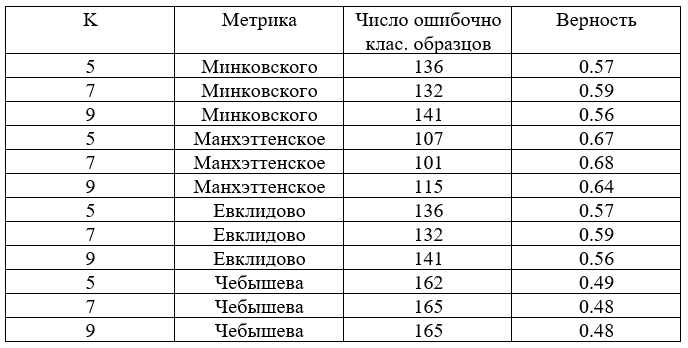

In [1252]:
from IPython.display import Image
Image("C:/Users/User/Pictures/Screenshots/Снимок экрана (3142).png", width=520, height=440)

E:\anaconda\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


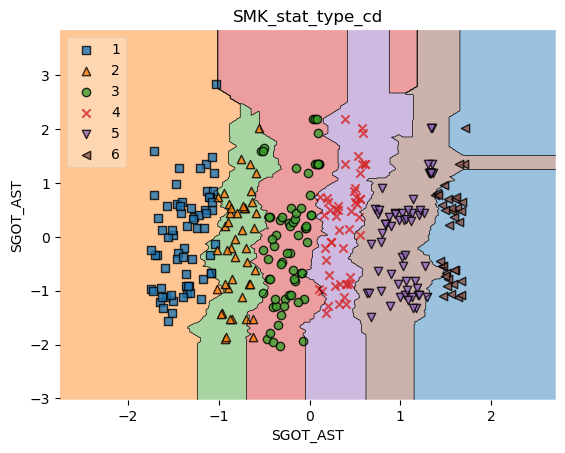

In [1253]:
from mlxtend.plotting import plot_decision_regions 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC

svm = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')
svm.fit(X_train[:,[0,1]], y_train)

#Plotting decision regions
plot_decision_regions(X_test[:,[0,1]], y_test.astype(np.int_), clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('SGOT_AST')
plt.ylabel('SGOT_AST')
plt.title('SMK_stat_type_cd')
plt.show()

В итоге для данного датасета наилучший результат классификации с верностью 0.68 был получен для манхэттенской метрики с количеством ближайших соседей, равным 7, и числом ошибочно классифицированных образцов, равное 101.